# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 9 de octubre, 2020 23:59
</div>

In [25]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


In [33]:


class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        xt = x.reshape(x.shape[0], 1)
        xt = np.concatenate((unos, xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(xt, y)
            
            J = self.costo(xt, y)
            
            if (abs(J - prep_J) <= self.tols):
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m   

In [66]:
def plotModelo(x,y,r1,xlabel,ylabel,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

## Problema 2

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [28]:
chirpsPerSec_arr = []
temp_arr = []
chirps = open('data/chirps-Copy1.txt', "r")
chirps.readline()
for line in chirps:
    reader = line.split("\t")
    chirpsPerSec_arr.append(float(reader[0]))
    temp_arr.append(float(reader[1]))
    
CPS = np.array(chirpsPerSec_arr)
T = np.array(temp_arr)

Text(0, 0.5, 'Temperature (º F)')

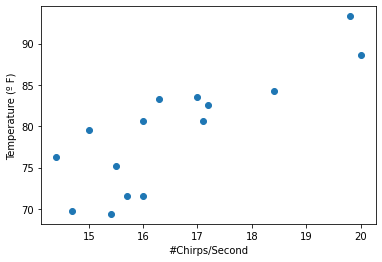

In [29]:
plt.scatter(CPS,T, label="data")
plt.xlabel('#Chirps/Second')
plt.ylabel('Temperature (º F)')

In [79]:
r = RegresionLineal()
r.gradientDescent(CPS,T)

<ipython-input-33-12c2ddb66ae1>:40: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J - prep_J) <= self.tols):


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [97]:
anscombe_arr = np.loadtxt('anscombe.txt')

anscombe_arr_fin=[[],[],[],[],[],[],[],[]]
for i in anscombe_arr:
    k = 0
    for j in i:
        anscombe_arr_fin[k].append(j)
        k+=1
anscombe_arr_fin = np.array(anscombe_arr_fin)

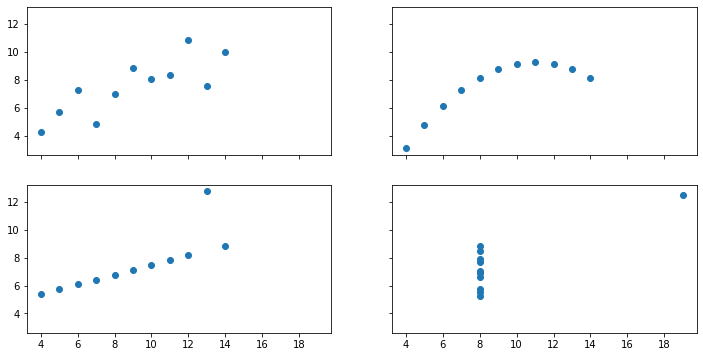

In [98]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey = True)
fig.set_size_inches(12,6)
ax[0,0].scatter(anscombe_arr_fin[0],anscombe_arr_fin[1])
ax[0,1].scatter(anscombe_arr_fin[2],anscombe_arr_fin[3])
ax[1,0].scatter(anscombe_arr_fin[4],anscombe_arr_fin[5])
ax[1,1].scatter(anscombe_arr_fin[6],anscombe_arr_fin[7])

In [99]:
reg4_1 = RegresionLineal()
reg4_2 = RegresionLineal()
reg4_3 = RegresionLineal()
reg4_4 = RegresionLineal()

In [100]:
reg4_1.gradientDescent(anscombe_arr_fin[0],anscombe_arr_fin[1])
reg4_2.gradientDescent(anscombe_arr_fin[2],anscombe_arr_fin[3])
reg4_3.gradientDescent(anscombe_arr_fin[4],anscombe_arr_fin[5])
reg4_4.gradientDescent(anscombe_arr_fin[6],anscombe_arr_fin[7])

## Problema 5

Use el archivo `radioactive_decay.dat`

In [37]:
time_arr = []
N_arr = []
radioactive_decay = open('data/radioactive_decay-Copy1.txt', "r")
radioactive_decay.readline()
for line in radioactive_decay:
    reader = line.split("\t")
    time_arr.append(float(reader[0]))
    N_arr.append(float(reader[1]))
    
time = np.array(time_arr)
Ns = np.array(N_arr)

**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'N (remaining)')

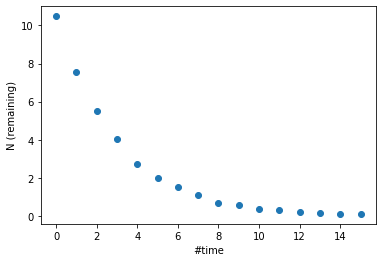

In [42]:
plt.scatter(time,Ns, label="data")
plt.xlabel('#time')
plt.ylabel('N (remaining)')

**Respuesta:** Los datos tienen forma exponencial.

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**Respuesta:** Para linearizar estos datos debemos pasar los valores de y por la funcion logaritmo. De esta manera, si $\ y = Ae^{kx}$ entonces la transformacion resultara en \$log(y)=kx+logA$.

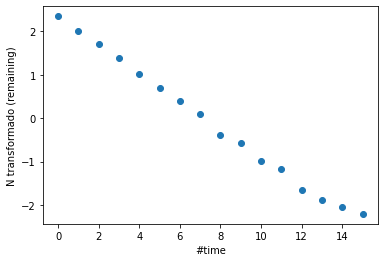

In [43]:
N_transf = []
for i in N_arr:
    N_transf.append(np.log(i))
    
N_transf
plt.scatter(time,N_transf, label="data")
plt.xlabel('#time')
plt.ylabel('N transformado (remaining)')
np.savetxt("transform_radioactive_decay.txt", N_transf, fmt="%s")

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [67]:
reg5 = RegresionLineal()
x_5 = np.array(time_arr)
y_5 = np.loadtxt('transform_radioactive_decay.txt')
reg5.gradientDescent(x_5,y_5)

In [65]:
ultima_iteracion_reg5 = (reg5.breaking_iteration - 1) if reg5.breaking_iteration else (reg5.max_iters - 1)

interact(plotModelo, x=fixed(x_5), y=fixed(y_5), r1=fixed(reg5), xlabel=fixed('#time'), ylabel=fixed('N (remaining)'), iteracion=(0,ultima_iteracion_reg5,10));

ValueError: cannot find widget or abbreviation for argument: 'rl'

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.